<>:26: SyntaxWarning: invalid escape sequence '\.'
<>:26: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Myth\AppData\Local\Temp\ipykernel_25860\1328715504.py:26: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)



Evaluating: LogisticRegression
LogisticRegression ROC AUC: 0.8840

Evaluating: DecisionTree
DecisionTree ROC AUC: 0.8018

Evaluating: GradientBoosting
GradientBoosting ROC AUC: 0.9035

Evaluating: NeuralNetwork
NeuralNetwork ROC AUC: 0.8681

Best Model: GradientBoosting
CV Accuracy: 0.8371
Test Accuracy: 0.8268
ROC AUC: 0.9035


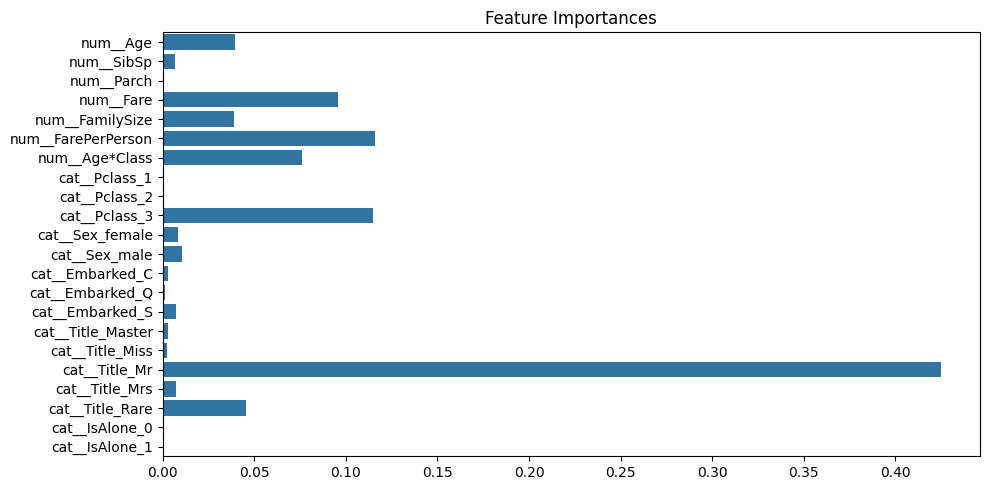


Average Survival Probability by Pclass:
Pclass
1    0.602508
2    0.500502
3    0.246094
Name: Survival_Prob, dtype: float64


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score

# # Load Titanic dataset
# df = pd.read_csv('Titanic.csv')

# # Fill missing values for Age, Embarked, and Fare
# # Using median for numerical and mode for categorical values
# df['Age'] = df['Age'].fillna(df['Age'].median())
# df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# # Extract title from Name and group rare titles
# df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
#                                    'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
# df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
# df['Title'] = df['Title'].replace('Mme', 'Mrs')

# # Engineer additional features
# # Family size: total number of family members aboard
# # IsAlone: indicator if the person is traveling alone
# # FarePerPerson: adjusted fare per individual
# # Age*Class: interaction between age and passenger class

# df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
# df['FarePerPerson'] = df['Fare'] / df['FamilySize']
# df['Age*Class'] = df['Age'] * df['Pclass']

# # Select input features and target variable
# features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
#             'Title', 'FamilySize', 'IsAlone', 'FarePerPerson', 'Age*Class']
# target = 'Survived'

# X = df[features]
# y = df[target]

# # Define numeric and categorical features for preprocessing
# numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'FarePerPerson', 'Age*Class']
# categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone']

# # Create preprocessing pipelines for numeric and categorical data
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Combine transformers using ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Initialize classifiers
# models = {
#     'LogisticRegression': LogisticRegression(max_iter=500),
#     'DecisionTree': DecisionTreeClassifier(),
#     'GradientBoosting': GradientBoostingClassifier(),
#     'NeuralNetwork': MLPClassifier(max_iter=2000)
# }

# # Variables to keep track of the best performing model
# best_model = None
# best_score = 0
# best_model_name = ""

# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Evaluate each model
# for name, model in models.items():
#     print(f"\nEvaluating: {name}")

#     # Create full pipeline with preprocessing and classifier
#     clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
#     clf.fit(X_train, y_train)

#     # Predict on test set
#     y_pred = clf.predict(X_test)
#     y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

#     # Compute accuracy and ROC AUC
#     accuracy = accuracy_score(y_test, y_pred)
#     roc_auc = roc_auc_score(y_test, y_pred_proba)

#     print(f"{name} ROC AUC: {roc_auc:.4f}")

#     # Cross-validation to evaluate generalization performance
#     cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
#     avg_cv = cv_scores.mean()

#     # Keep track of best performing model
#     if avg_cv > best_score:
#         best_score = avg_cv
#         best_model = clf
#         best_model_name = name

# # Print best model and its performance
# print(f"\nBest Model: {best_model_name}")
# print(f"CV Accuracy: {best_score:.4f}")
# print(f"Test Accuracy: {accuracy_score(y_test, best_model.predict(X_test)):.4f}")
# print(f"ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]):.4f}")

# # Plot feature importances for tree-based models
# if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
#     # Note: This part may need feature name alignment depending on preprocessing
#     importances = best_model.named_steps['classifier'].feature_importances_
#     feature_names = preprocessor.get_feature_names_out()
#     plt.figure(figsize=(10, 5))
#     sns.barplot(x=importances, y=feature_names)
#     plt.title("Feature Importances")
#     plt.tight_layout()
#     plt.show()

# # Add predicted survival probability to dataframe
# # This helps in analyzing survival probabilities across groups
# X_preprocessed = preprocessor.fit_transform(X)
# df['Survival_Prob'] = best_model.named_steps['classifier'].predict_proba(X_preprocessed)[:, 1]

# # Show average survival probabilities grouped by Pclass
# print("\nAverage Survival Probability by Pclass:")
# print(df.groupby('Pclass')['Survival_Prob'].mean())


<>:27: SyntaxWarning: invalid escape sequence '\.'
<>:27: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Myth\AppData\Local\Temp\ipykernel_24948\1831274575.py:27: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)



Evaluating: LogisticRegression
LogisticRegression ROC AUC: 0.8840

Evaluating: DecisionTree
DecisionTree ROC AUC: 0.8037

Evaluating: GradientBoosting
GradientBoosting ROC AUC: 0.9041

Evaluating: NeuralNetwork


C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


NeuralNetwork ROC AUC: 0.8840


C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Best Model: GradientBoosting
CV Accuracy: 0.8399
Test Accuracy: 0.8268
ROC AUC: 0.9041


C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


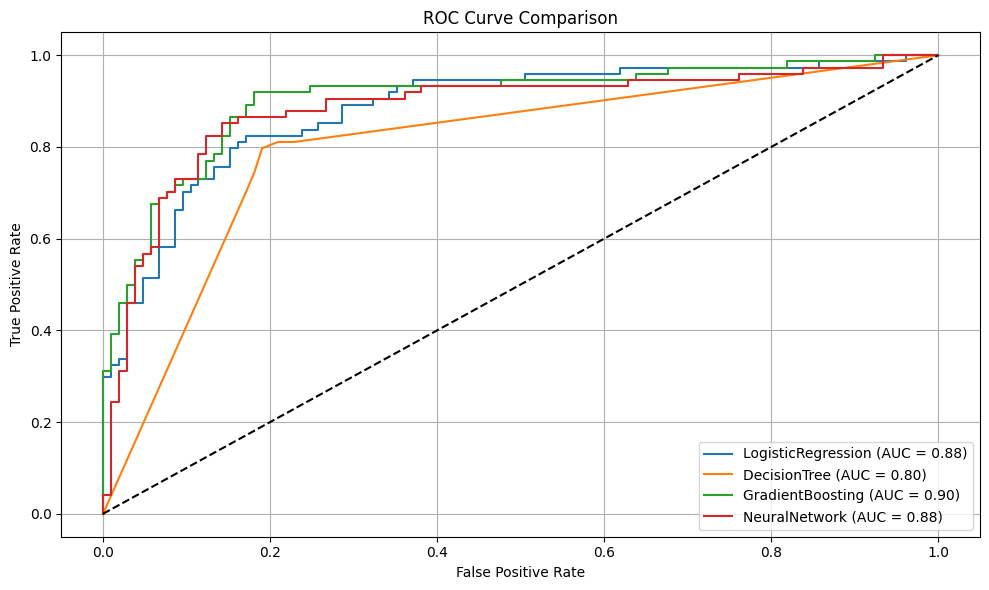

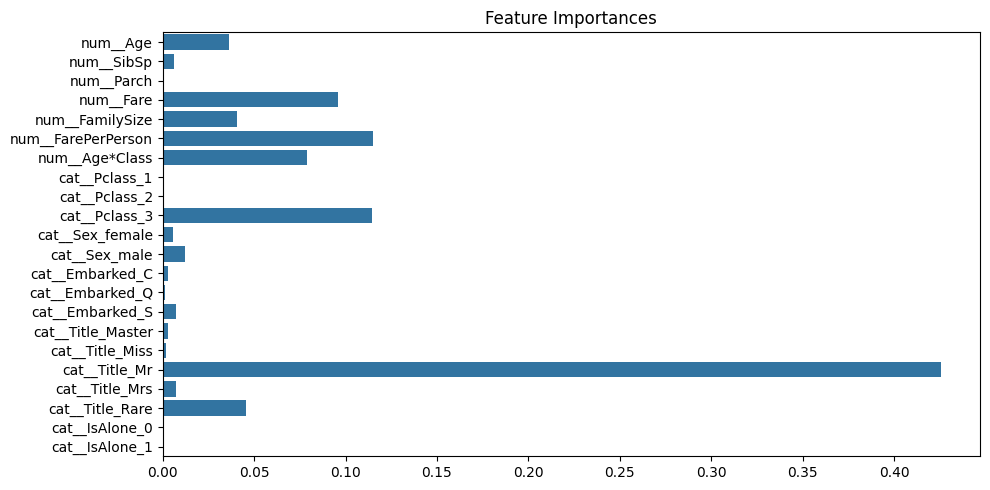


Average Survival Probability by Pclass:
Pclass
1    0.602419
2    0.500310
3    0.248100
Name: Survival_Prob, dtype: float64


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# # Load Titanic dataset
# # This dataset contains information about passengers and whether they survived
# df = pd.read_csv('Titanic.csv')

# # Fill missing values for Age, Embarked, and Fare
# # Median is used for numerical values and mode for categorical values
# df['Age'] = df['Age'].fillna(df['Age'].median())
# df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# # Extract title from Name and group rare titles
# df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
#                                    'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
# df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
# df['Title'] = df['Title'].replace('Mme', 'Mrs')

# # Engineer additional features
# df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Total people with passenger

# df['IsAlone'] = (df['FamilySize'] == 1).astype(int)  # Binary feature: is the person alone

# df['FarePerPerson'] = df['Fare'] / df['FamilySize']  # Divide fare among family members

# df['Age*Class'] = df['Age'] * df['Pclass']  # Interaction feature

# # Select features for modeling
# features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
#             'Title', 'FamilySize', 'IsAlone', 'FarePerPerson', 'Age*Class']
# target = 'Survived'

# X = df[features]
# y = df[target]

# # Define columns by data type
# numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'FarePerPerson', 'Age*Class']
# categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone']

# # Pipeline for numeric data: impute then scale
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# # Pipeline for categorical data: impute then one-hot encode
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Define classifiers to evaluate
# models = {
#     'LogisticRegression': LogisticRegression(max_iter=500),
#     'DecisionTree': DecisionTreeClassifier(),
#     'GradientBoosting': GradientBoostingClassifier(),
#     'NeuralNetwork': MLPClassifier(max_iter=500)
# }

# best_model = None
# best_score = 0
# best_model_name = ""
# results = {}  # To store performance for plotting

# # Train/test split for evaluation
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Evaluate each model in the dictionary
# for name, model in models.items():
#     print(f"\nEvaluating: {name}")

#     # Full pipeline: preprocessing + model
#     clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
#     clf.fit(X_train, y_train)

#     y_pred = clf.predict(X_test)
#     y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

#     accuracy = accuracy_score(y_test, y_pred)
#     roc_auc = roc_auc_score(y_test, y_pred_proba)

#     print(f"{name} ROC AUC: {roc_auc:.4f}")

#     # 5-fold cross-validation on training data
#     cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
#     avg_cv = cv_scores.mean()

#     # Track performance
#     results[name] = {
#         'model': clf,
#         'roc_auc': roc_auc,
#         'cv': avg_cv
#     }

#     if avg_cv > best_score:
#         best_score = avg_cv
#         best_model = clf
#         best_model_name = name

# # Report best model
# print(f"\nBest Model: {best_model_name}")
# print(f"CV Accuracy: {results[best_model_name]['cv']:.4f}")
# print(f"Test Accuracy: {accuracy_score(y_test, best_model.predict(X_test)):.4f}")
# print(f"ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]):.4f}")

# # Plot ROC curves for all models
# plt.figure(figsize=(10, 6))
# for name, res in results.items():
#     fpr, tpr, _ = roc_curve(y_test, res['model'].predict_proba(X_test)[:, 1])
#     plt.plot(fpr, tpr, label=f'{name} (AUC = {res["roc_auc"]:.2f})')

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Comparison')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Show feature importances if available
# if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
#     importances = best_model.named_steps['classifier'].feature_importances_
#     feature_names = preprocessor.get_feature_names_out()
#     plt.figure(figsize=(10, 5))
#     sns.barplot(x=importances, y=feature_names)
#     plt.title("Feature Importances")
#     plt.tight_layout()
#     plt.show()

# # Predict probabilities for whole dataset
# X_preprocessed = preprocessor.fit_transform(X)
# df['Survival_Prob'] = best_model.named_steps['classifier'].predict_proba(X_preprocessed)[:, 1]

# # Show average survival probability by Pclass
# print("\nAverage Survival Probability by Pclass:")
# print(df.groupby('Pclass')['Survival_Prob'].mean())



Survival Rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<>:27: SyntaxWarning: invalid escape sequence '\.'
<>:27: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Myth\AppData\Local\Temp\ipykernel_24948\1756583046.py:27: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


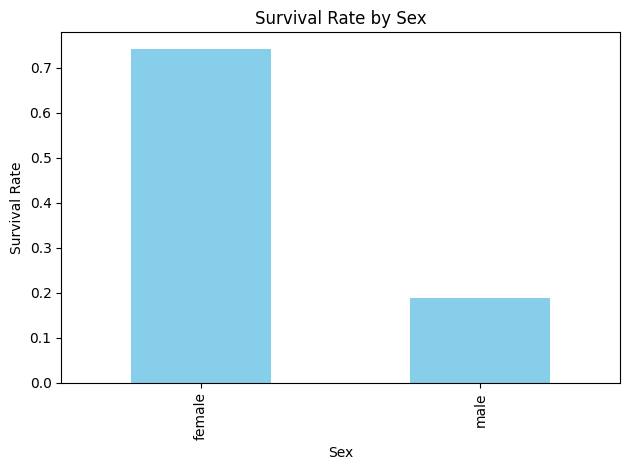


Survival Rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


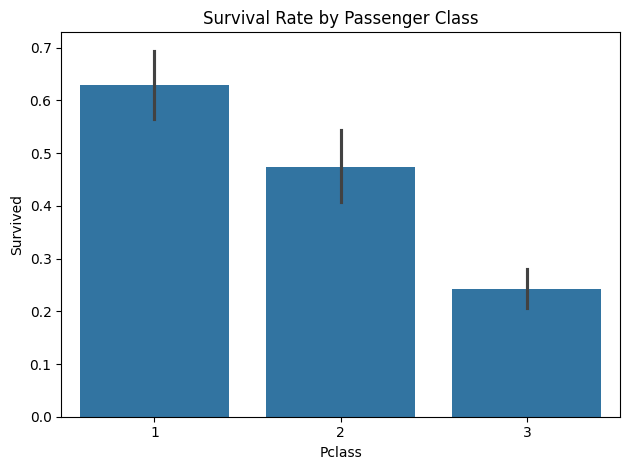

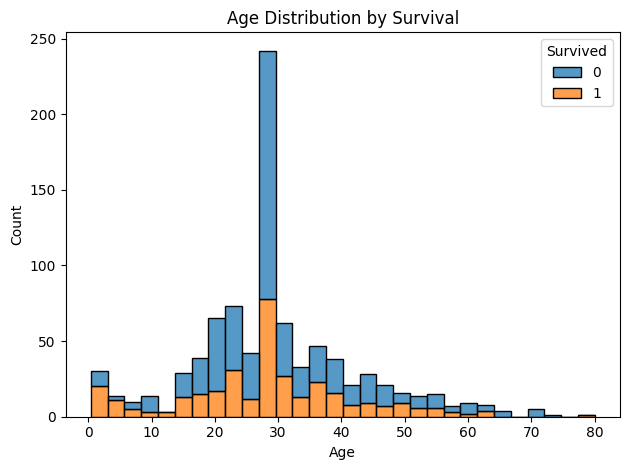

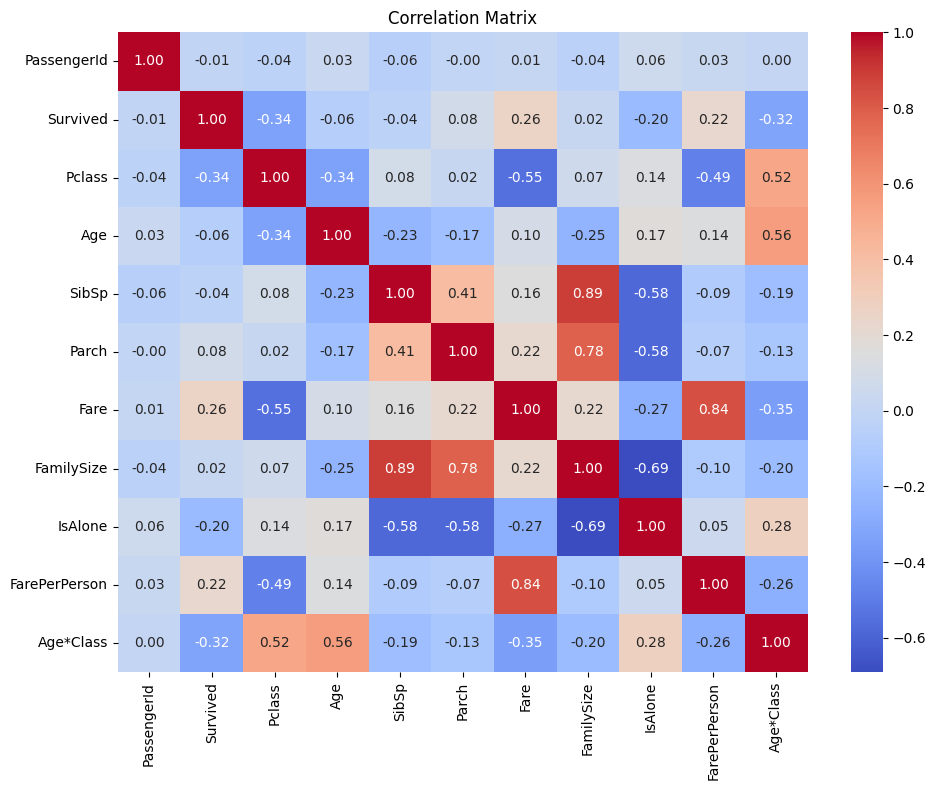


Evaluating: LogisticRegression
LogisticRegression ROC AUC: 0.8840

Evaluating: DecisionTree
DecisionTree ROC AUC: 0.7841

Evaluating: GradientBoosting
GradientBoosting ROC AUC: 0.9041

Evaluating: NeuralNetwork
NeuralNetwork ROC AUC: 0.8556

Best Model: GradientBoosting
CV Accuracy: 0.8371
Test Accuracy: 0.8268
ROC AUC: 0.9041


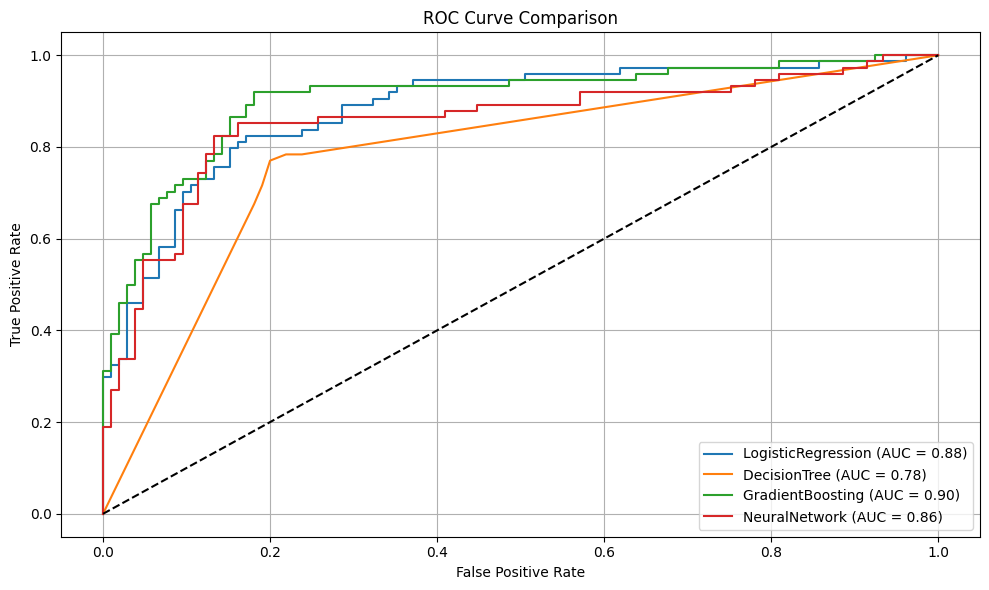

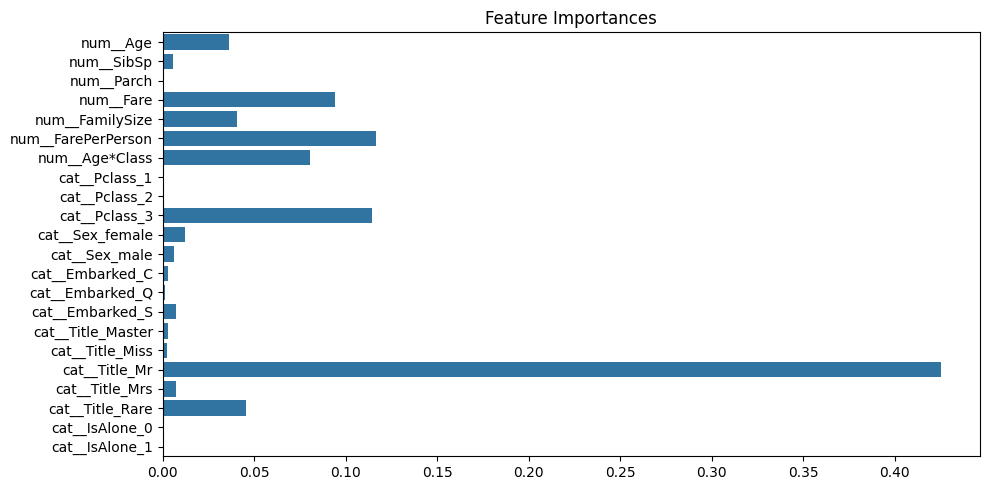


Average Survival Probability by Pclass:
Pclass
1    0.602606
2    0.499681
3    0.249137
Name: Survival_Prob, dtype: float64


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load Titanic dataset
# This dataset contains information about passengers and whether they survived
df = pd.read_csv('Titanic.csv')

# Fill missing values for Age, Embarked, and Fare
# Median is used for numerical values and mode for categorical values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Extract title from Name and group rare titles
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Engineer additional features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Total people with passenger
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)  # Binary feature: is the person alone
df['FarePerPerson'] = df['Fare'] / df['FamilySize']  # Divide fare among family members
df['Age*Class'] = df['Age'] * df['Pclass']  # Interaction feature

# --- Exploratory Data Analysis (EDA) ---

# Survival rate by sex
print("\nSurvival Rate by Sex:")
print(df.groupby('Sex')['Survived'].mean())
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

# Survival rate by passenger class
print("\nSurvival Rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.tight_layout()
plt.show()

# Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Select features for modeling
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
            'Title', 'FamilySize', 'IsAlone', 'FarePerPerson', 'Age*Class']
target = 'Survived'

X = df[features]
y = df[target]

# Define columns by data type
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'FarePerPerson', 'Age*Class']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone']

# Pipeline for numeric data: impute then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical data: impute then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define classifiers to evaluate
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'NeuralNetwork': MLPClassifier(max_iter=2000)
}

best_model = None
best_score = 0
best_model_name = ""
results = {}  # To store performance for plotting

# Train/test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model in the dictionary
for name, model in models.items():
    print(f"\nEvaluating: {name}")

    # Full pipeline: preprocessing + model
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"{name} ROC AUC: {roc_auc:.4f}")

    # 5-fold cross-validation on training data
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    avg_cv = cv_scores.mean()

    # Track performance
    results[name] = {
        'model': clf,
        'roc_auc': roc_auc,
        'cv': avg_cv
    }

    if avg_cv > best_score:
        best_score = avg_cv
        best_model = clf
        best_model_name = name

# Report best model
print(f"\nBest Model: {best_model_name}")
print(f"CV Accuracy: {results[best_model_name]['cv']:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, best_model.predict(X_test)):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]):.4f}")

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['model'].predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {res["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Show feature importances if available
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    importances = best_model.named_steps['classifier'].feature_importances_
    feature_names = preprocessor.get_feature_names_out()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=importances, y=feature_names)
    plt.title("Feature Importances")
    plt.tight_layout()
    plt.show()

# Predict probabilities for whole dataset
X_preprocessed = preprocessor.fit_transform(X)
df['Survival_Prob'] = best_model.named_steps['classifier'].predict_proba(X_preprocessed)[:, 1]

# Show average survival probability by Pclass
print("\nAverage Survival Probability by Pclass:")
print(df.groupby('Pclass')['Survival_Prob'].mean())
